In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
print(df.head())
print(df.info())
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

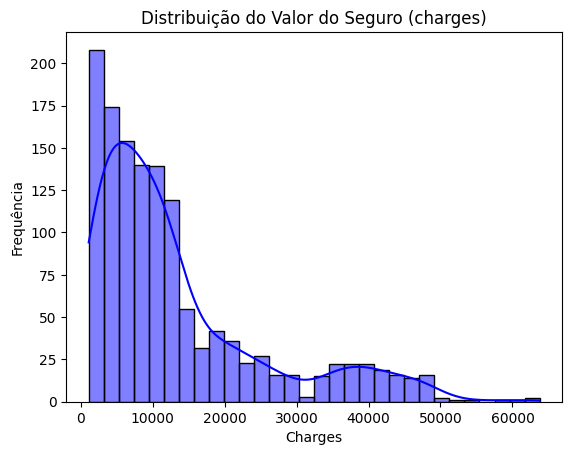

In [7]:
sns.histplot(df['charges'], kde=True, bins=30, color='blue')
plt.title('Distribuição do Valor do Seguro (charges)')
plt.xlabel('Charges')
plt.ylabel('Frequência')
plt.show()

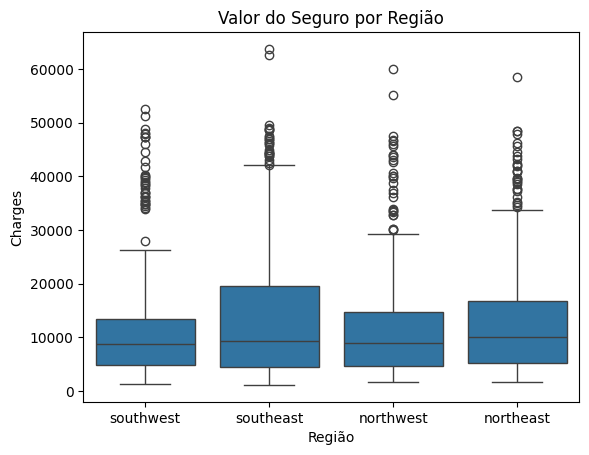

In [10]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Valor do Seguro por Região')
plt.xlabel('Região')
plt.ylabel('Charges')
plt.show()

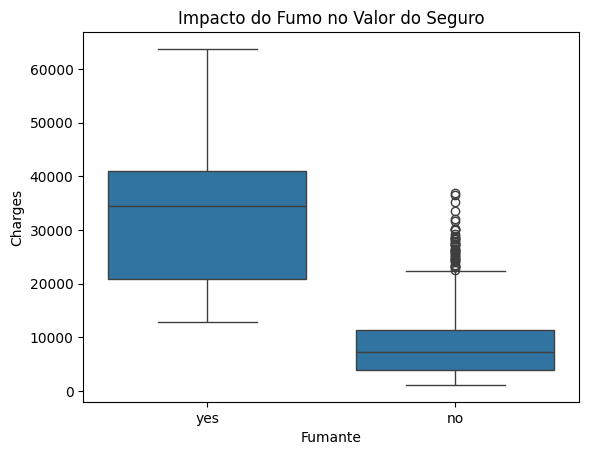

In [11]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Impacto do Fumo no Valor do Seguro')
plt.xlabel('Fumante')
plt.ylabel('Charges')
plt.show()

In [13]:
# Codificar Variáveis Categóricas

from sklearn.preprocessing import LabelEncoder

# Codificar variáveis categóricas
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # 0: female, 1: male
df['smoker'] = label_encoder.fit_transform(df['smoker'])  # 0: no, 1: yes
df['region'] = label_encoder.fit_transform(df['region'])  # regiões codificadas

print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


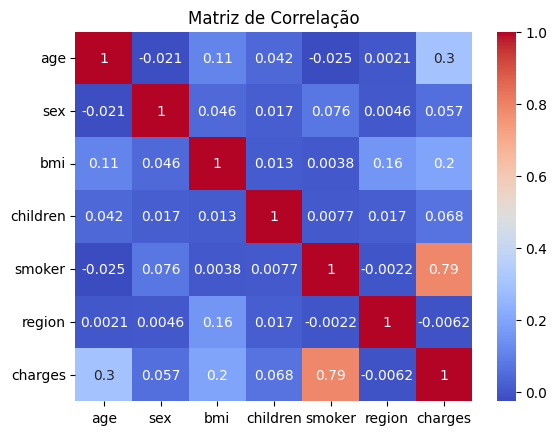

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Separar variáveis independentes (X) e dependente (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Modelo 1: Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Treinar o modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fazer previsões
y_pred_linear = linear_model.predict(X_test)

# Avaliar o modelo
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Regressão Linear - MSE: {mse_linear}, R2: {r2_linear}")

Regressão Linear - MSE: 33635210.431178406, R2: 0.7833463107364539


In [18]:
# Regressão com Random Forest
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R2: {r2_rf}")

Random Forest - MSE: 21073365.415079337, R2: 0.8642606273649586


In [19]:
# Regressão com Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Treinar o modelo
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões
y_pred_gb = gb_model.predict(X_test)

# Avaliar o modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - MSE: {mse_gb}, R2: {r2_gb}")

Gradient Boosting - MSE: 18944595.15596614, R2: 0.8779726251291786


              Modelo           MSE        R2
0   Regressão Linear  3.363521e+07  0.783346
1      Random Forest  2.107337e+07  0.864261
2  Gradient Boosting  1.894460e+07  0.877973


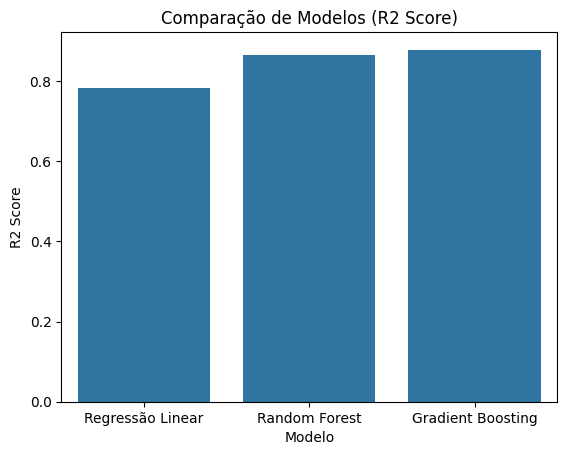

In [20]:
# Comparar Modelos e os resultados dos modelos
results = {
    "Modelo": ["Regressão Linear", "Random Forest", "Gradient Boosting"],
    "MSE": [mse_linear, mse_rf, mse_gb],
    "R2": [r2_linear, r2_rf, r2_gb]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualizar os resultados
sns.barplot(x="Modelo", y="R2", data=results_df)
plt.title("Comparação de Modelos (R2 Score)")
plt.ylabel("R2 Score")
plt.show()